In [182]:
import pandas as pd

In [183]:
# Leer el archivo CSV
df = pd.read_csv("./data/UK_foods.csv")

# Transponer el DataFrame
df_transposed = df.T

# Convertir la primera fila transpuesta en el encabezado y eliminarla del cuerpo del DataFrame
new_header = df_transposed.iloc[0]
df_transposed = df_transposed[1:]
df_transposed.columns = new_header

# Resetea el índice
df_transposed = df_transposed.reset_index()

# Cambiar el nombre de la nueva columna creada por el reset_index, si lo deseas
data = df_transposed.rename(columns={"index": "Country"})


# Opcional: Guardar el DataFrame transpuesto en un nuevo archivo CSV
# df_transposed.to_csv('archivo_transpuesto.csv', index=False)

data.head()

Product,Country,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


Epoch 1/50
1/1 [==============================] - 0s 428ms/step - loss: 0.2046 - val_loss: 0.2041
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2041 - val_loss: 0.2035
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2035 - val_loss: 0.2030
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2030 - val_loss: 0.2025
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2025 - val_loss: 0.2019
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2019 - val_loss: 0.2014
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.2014 - val_loss: 0.2009
Epoch 8/50
1/1 [==============================] - 0s 36ms/step - loss: 0.2009 - val_loss: 0.2004
Epoch 9/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2004 - val_loss: 0.1998
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1998 - val_loss: 0.1993
Epoch 11/50
1/1 [===========

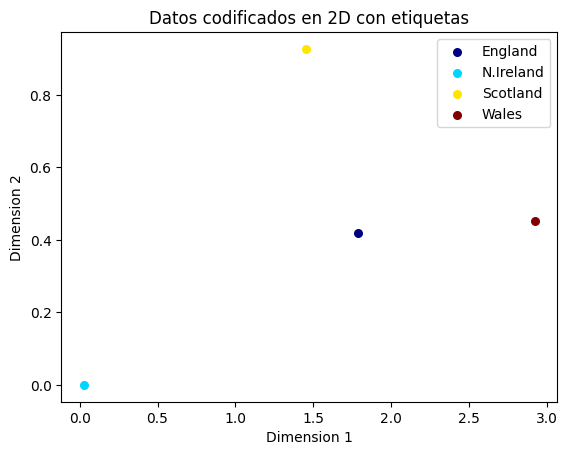

In [184]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Instancia el escalador
scaler = MinMaxScaler()

# Dimensiones de entrada y codificadas (encoded)
input_dim = 17
encoding_dim = 2

# Define el encoder
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)

# Define el decoder
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

# Combina el encoder y el decoder para crear el autoencoder
autoencoder = keras.models.Model(input_layer, decoded)

# También podemos extraer el encoder como un modelo separado
encoder = keras.models.Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Extrae las etiquetas antes de eliminar la columna "labels"
labels = data["Country"].values
data = data.drop("Country", axis=1)

# Normaliza las columnas
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# A continuación, continúa con el código anterior usando 'data_normalized' en lugar de 'data':
x_train = data_normalized.values
x_train = x_train.astype('float32')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_train, x_train))
encoded_data = encoder.predict(x_train)

# Transformar etiquetas a números para la visualización
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Visualizar datos codificados con colores basados en etiquetas
unique_labels = np.unique(encoded_labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    subset = encoded_data[encoded_labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], s=30, c=[colors[i]], label=label_encoder.inverse_transform([label])[0])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Datos codificados en 2D con etiquetas')
plt.legend()
plt.show()
